## Economic Dispatch on the 6 bus system

In [1]:
using Plots
using Base64
using Images
using CSV
using DataFrames
using DataStructures
using LinearAlgebra
using Printf
using Statistics
using JSON

In [2]:
parent = "c:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\EconDIspARO\\EconDispARO"

"c:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\EconDIspARO\\EconDispARO"

In [3]:
include("model_constructors_new.jl")
include("data_constructors.jl")

true

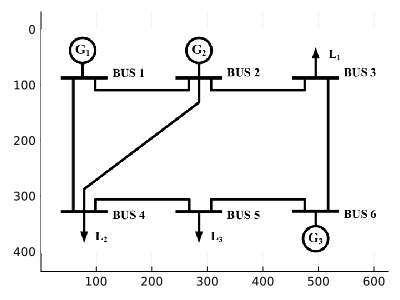

In [4]:
folder = "example_data\\6-bus system"
file = "6bus system.png"
img = load(joinpath(parent, folder, file))
# Plot the image
plot(img, size=(400, 300), legend=false)

In [5]:
pwd()

"c:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\EconDIspARO\\EconDispARO\\src"

In [6]:
## location for storing the data
storage_folder_name = "example_data\\6-bus system\\pre NN training"
storage_folder = joinpath(parent, storage_folder_name)

"c:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\EconDIspARO\\EconDispARO\\example_data\\6-bus system\\pre NN training"

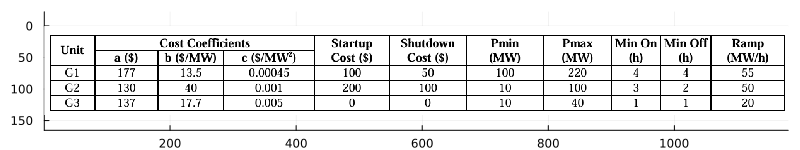

In [7]:
file = "gen_data.png"
img = load(joinpath(parent, folder, file))
# Plot the image
plot(img, size=(800, 150), legend=false)

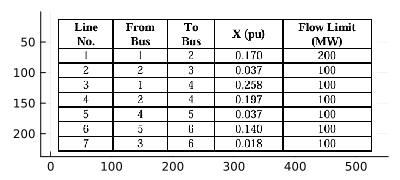

In [8]:
file = "transmission_data.png"
img = load(joinpath(parent, folder, file))
# Plot the image
plot(img, size=(400, 180), legend=false)

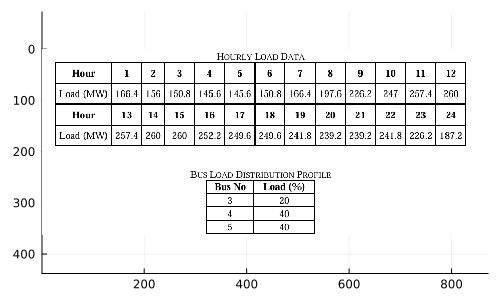

In [9]:
file = "load_data.png"
img = load(joinpath(parent, folder, file))
# Plot the image
plot(img, size=(500, 300), legend=false)

In [10]:
##### generator data, some columns are floats, some are integers
gen_data_df = CSV.read(joinpath(parent, folder, "generator_data.csv"), DataFrame)
gen_data_df

Row,generator_no,start_up_cost,shut_down_cost,constant_cost_coeff,linear_cost_coeff,min_power,max_power,min_up_time,min_down_time,ramp_up_limit,ramp_down_limit,start_ramp_limit,shut_ramp_limit,bus_no
,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,100,50,177,13.5,100,220,4,4,55,55,55,55,1
2,2,200,100,130,40.0,10,100,3,2,50,50,50,50,2
3,3,0,0,137,17.7,10,40,1,1,20,20,20,20,6


In [11]:
bus_to_generator_dict = Group_Generators_by_Bus(gen_data_df.generator_no, gen_data_df.bus_no)

OrderedDict{Int64, Vector{Int64}} with 3 entries:
  1 => [1]
  2 => [2]
  6 => [3]

In [12]:
## put the generator data through the constructor for the generator data
power_generator_property_dict = Power_Generator_Set(gen_data_df)

OrderedDict{Any, Any} with 3 entries:
  1 => (generator_no = 1, start_up_cost = 100, shut_down_cost = 50, constant_co…
  2 => (generator_no = 2, start_up_cost = 200, shut_down_cost = 100, constant_c…
  3 => (generator_no = 3, start_up_cost = 0, shut_down_cost = 0, constant_cost_…

In [13]:
## transmission data
transmission_data_df = CSV.read(joinpath(parent, folder, "line_data.csv"), DataFrame)
transmission_data_df

Row,edge no,susceptance,min capacity,max capacity,node 1,node 2
,Int64,Float64,Int64,Int64,Int64,Int64
1,1,5.88235,0,200,1,2
2,2,27.027,0,100,2,3
3,3,3.87597,0,100,1,4
4,4,5.07614,0,100,2,4
5,5,27.027,0,100,4,5
6,6,7.14286,0,100,5,6
7,7,55.5556,0,100,3,6


In [14]:
## put the transmission data through the constructor for the transmission data
edge_properties = Edge_Properties_Set(transmission_data_df)
println(edge_properties)

OrderedDict{Any, Any}(1 => (edge_no = 1, susceptance = 5.882352941, min_capacity = 0, max_capacity = 200, node_tuple = (1, 2)), 2 => (edge_no = 2, susceptance = 27.02702703, min_capacity = 0, max_capacity = 100, node_tuple = (2, 3)), 3 => (edge_no = 3, susceptance = 3.875968992, min_capacity = 0, max_capacity = 100, node_tuple = (1, 4)), 4 => (edge_no = 4, susceptance = 5.076142132, min_capacity = 0, max_capacity = 100, node_tuple = (2, 4)), 5 => (edge_no = 5, susceptance = 27.02702703, min_capacity = 0, max_capacity = 100, node_tuple = (4, 5)), 6 => (edge_no = 6, susceptance = 7.142857143, min_capacity = 0, max_capacity = 100, node_tuple = (5, 6)), 7 => (edge_no = 7, susceptance = 55.55555556, min_capacity = 0, max_capacity = 100, node_tuple = (3, 6)))


In [15]:
## demand dict per bus
bus_to_demand_dict = OrderedDict()

## load data
load_data_df = CSV.read(joinpath(parent, folder, "Nominal load.csv"), DataFrame)

for bus in 1:size(load_data_df, 1)
    bus_to_demand_dict[load_data_df[bus, 1]] = vcat(load_data_df[bus, 2:end]...)
end

input_bus_to_demand_dict = OrderedDict()
input_bus_to_demand_dict[1] = bus_to_demand_dict

OrderedDict{Any, Any} with 3 entries:
  3 => [33.28, 31.2, 30.16, 29.12, 29.12, 30.16, 33.28, 39.52, 45.24, 49.4  …  …
  4 => [66.56, 62.4, 60.32, 58.24, 58.24, 60.32, 66.56, 79.04, 90.48, 98.8  …  …
  5 => [66.56, 62.4, 60.32, 58.24, 58.24, 60.32, 66.56, 79.04, 90.48, 98.8  …  …

In [16]:
input_bus_to_demand_dict[1]

OrderedDict{Any, Any} with 3 entries:
  3 => [33.28, 31.2, 30.16, 29.12, 29.12, 30.16, 33.28, 39.52, 45.24, 49.4  …  …
  4 => [66.56, 62.4, 60.32, 58.24, 58.24, 60.32, 66.56, 79.04, 90.48, 98.8  …  …
  5 => [66.56, 62.4, 60.32, 58.24, 58.24, 60.32, 66.56, 79.04, 90.48, 98.8  …  …

In [17]:
joinpath(storage_folder, "generated_load.json")

"c:\\Users\\dube.rohit\\OneDrive - Texas A&M University\\EconDIspARO\\EconDispARO\\example_data\\6-bus system\\pre NN training\\generated_load.json"

In [18]:
##### open the JSON file of loads to test for many loads and save the data to dict
generated_loads = OrderedDict()
file_name = joinpath(storage_folder, "generated_load.json")
open(file_name) do file
    data = JSON.parse(file)
    for key in keys(data)
        ## convert the string key to an integer key
        parsed_key = parse(Int, key)
        generated_loads[parsed_key] = convert_keys_to_int(data[key])
    end
end
generated_loads = sort_values_by_keys(generated_loads)

OrderedDict{Any, Any} with 1000 entries:
  1  => OrderedDict{Any, Any}(3=>Any[27.2786, 26.4461, 28.8724, 23.5767, 31.354…
  2  => OrderedDict{Any, Any}(3=>Any[36.1681, 30.8771, 35.7512, 28.2447, 30.622…
  3  => OrderedDict{Any, Any}(3=>Any[27.6082, 36.7955, 35.6198, 27.0629, 26.599…
  4  => OrderedDict{Any, Any}(3=>Any[27.6916, 25.2466, 31.3237, 25.3735, 26.935…
  5  => OrderedDict{Any, Any}(3=>Any[38.7967, 36.5937, 34.9222, 32.6947, 34.774…
  6  => OrderedDict{Any, Any}(3=>Any[33.7526, 34.13, 33.77, 31.7481, 34.3462, 2…
  7  => OrderedDict{Any, Any}(3=>Any[32.4572, 30.0933, 35.9335, 34.0585, 27.849…
  8  => OrderedDict{Any, Any}(3=>Any[28.5794, 25.4318, 24.1454, 31.6274, 30.518…
  9  => OrderedDict{Any, Any}(3=>Any[37.3806, 30.4879, 31.7085, 24.0826, 23.447…
  10 => OrderedDict{Any, Any}(3=>Any[38.6489, 28.4916, 29.9052, 28.5513, 26.773…
  11 => OrderedDict{Any, Any}(3=>Any[39.4521, 33.5782, 34.5284, 33.2065, 28.698…
  12 => OrderedDict{Any, Any}(3=>Any[37.4368, 25.397, 35.9046, 30.95

In [19]:
input_bus_to_demand_dict = OrderedDict()
input_bus_to_demand_dict[1] = generated_loads[1]
# input_bus_to_demand_dict[2] = generated_loads[383]

OrderedDict{Any, Any} with 3 entries:
  3 => Any[27.2786, 26.4461, 28.8724, 23.5767, 31.3548, 33.3873, 27.7855, 45.14…
  4 => Any[53.3094, 59.0742, 71.0405, 57.3326, 65.9355, 62.0845, 57.9505, 66.86…
  5 => Any[70.1899, 65.6718, 70.219, 54.354, 56.6453, 63.7353, 70.1382, 72.9863…

In [20]:
model_env = Gurobi.Env()
num_buses = 6
num_gens = 3
time_period = 24
high_cost = 500
model_results = Econ_Disp_Model(model_env, num_buses, num_gens,
                                power_generator_property_dict,
                                input_bus_to_demand_dict, 
                                bus_to_generator_dict, 
                                edge_properties, 
                                high_cost, 
                                time_period)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-14


OrderedDict{Any, Any} with 11 entries:
  "gen_on"                  => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 0.0 1.0 ……
  "gen_off"                 => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 0.0; 0.0 1.0 ……
  "gen_bin"                 => [1.0 1.0 … 1.0 1.0; 0.0 0.0 … 0.0 0.0; 0.0 0.0 ……
  "first_stage_cost"        => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 100.0 0.0; 0.0 0.0…
  "gen_power_list"          => Any[[150.778 151.192 … 209.975 185.084; 0.0 0.0 …
  "theta_list"              => Any[[0.0 0.0 … 0.0 0.0; -13.5278 -13.5137 … -18.…
  "line_flow_list"          => Any[[-79.5754 -79.4923 … -109.975 -97.7536; -54.…
  "second_stage_cost"       => Any[[2212.5 2218.09 … 3011.67 2675.63; 0.0 0.0 ……
  "full_first_and_second_s… => Any[89362.1]
  "objective_value"         => 89362.1
  "status"                  => OPTIMAL

In [21]:
bus_to_generator_dict

OrderedDict{Int64, Vector{Int64}} with 3 entries:
  1 => [1]
  2 => [2]
  6 => [3]

In [22]:
keys(power_generator_property_dict[1])

(:generator_no, :start_up_cost, :shut_down_cost, :constant_cost_coefficient, :linear_cost_coefficient, :Min_electricty_output_limit, :Max_electricty_output_limit, :Min_up_time, :Min_down_time, :Ramp_up_limit, :Ramp_down_limit, :Start_up_ramp_rate_limit, :Shut_down_ramp_rate_limit, :bus_no)

In [23]:
# np.array([gen_data_copy.loc[raw_data_copy.iloc[row_no,:]["gen_cost_factor"],:]["start_up_cost"][node_to_gen[node]],
#                                  gen_data_copy.loc[raw_data_copy.iloc[row_no,:]["gen_cost_factor"],:]["shut_down_cost"][node_to_gen[node]],
#                                   gen_data_copy.loc[raw_data_copy.iloc[row_no,:]["gen_cost_factor"],:]["constant_cost_coeff"][node_to_gen[node]],
#                                   gen_data_copy.loc[raw_data_copy.iloc[row_no,:]["gen_cost_factor"],:]["linear_cost_coeff"][node_to_gen[node]],
#                                   gen_data_copy.loc[raw_data_copy.iloc[row_no,:]["gen_cost_factor"],:]["min_power"][node_to_gen[node]],
#                                   gen_data_copy.loc[raw_data_copy.iloc[row_no,:]["gen_cost_factor"],:]["max_power"][node_to_gen[node]],
#                                 gen_data_copy.loc[raw_data_copy.iloc[row_no,:]["gen_cost_factor"],:]["ramp_up_limit"][node_to_gen[node]]]A

In [24]:
function ML_Input_per_load(first_stage_decision, bus_to_generator_dict, bus_to_demand_dict, power_generator_property_dict, high_cost)
    ## create an empty num_nodes x 56 matrix
    input_matrix = zeros(6, 56)
    ## fill in the first 24 columns with the first stage decision of the generator output as per dict_bus_to_generator_dict
    for (bus, generator_list) in bus_to_generator_dict
        for generator in generator_list
            input_matrix[bus, 1:24] .= first_stage_decision[generator, :]
            input_matrix[bus, 49] = power_generator_property_dict[generator].start_up_cost
            input_matrix[bus, 50] = power_generator_property_dict[generator].shut_down_cost
            input_matrix[bus, 51] = power_generator_property_dict[generator].constant_cost_coefficient
            input_matrix[bus, 52] = power_generator_property_dict[generator].linear_cost_coefficient
            input_matrix[bus, 53] = power_generator_property_dict[generator].Min_electricty_output_limit
            input_matrix[bus, 54] = power_generator_property_dict[generator].Max_electricty_output_limit
            input_matrix[bus, 55] = power_generator_property_dict[generator].Ramp_up_limit
            input_matrix[bus, 56] = high_cost

        end
    end

    for (bus, demand) in bus_to_demand_dict
        input_matrix[bus, 25:48] .= demand
    end
    return input_matrix
end
    

ML_Input_per_load (generic function with 1 method)

In [26]:
check = ML_Input_per_load(model_results["gen_bin"], bus_to_generator_dict, bus_to_demand_dict, power_generator_property_dict, high_cost)

6×56 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  13.5  100.0  220.0  55.0  500.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     40.0   10.0  100.0  50.0  500.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0    0.0    0.0   0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0    0.0    0.0   0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0    0.0    0.0   0.0    0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  17.7   10.0   40.0  20.0  500.0

In [27]:
input_bus_to_demand_dict = OrderedDict()
input_bus_to_demand_dict[1] = generated_loads[1]
input_bus_to_demand_dict[2] = generated_loads[383]

OrderedDict{Any, Any} with 3 entries:
  3 => Any[27.8579, 30.4597, 35.5213, 33.6183, 28.3419, 30.4018, 31.7724, 39.94…
  4 => Any[68.0089, 62.8619, 60.112, 59.6079, 52.014, 54.0934, 66.2047, 87.4639…
  5 => Any[61.2885, 61.0668, 52.2206, 68.2314, 61.3337, 63.5053, 78.1121, 94.42…

In [38]:
function ML_Input(model_results, bus_to_generator_dict, input_bus_to_demand_dict, power_generator_property_dict, high_cost)
    ## make an empty matrix of size 2 x 6 x 56
    output_matrix = zeros(2, 6, 56)
    index = 1
    for key in keys(input_bus_to_demand_dict)
        
        input = ML_Input_per_load(model_results, bus_to_generator_dict, input_bus_to_demand_dict[key], power_generator_property_dict, high_cost)

        # push!(output_matrix, input)
        # println(output_matrix)
        output_matrix[index, :, :] .= input
        index += 1
    end
    return output_matrix
end

ML_Input (generic function with 1 method)

In [39]:
out_mat = ML_Input(model_results["gen_bin"], bus_to_generator_dict, input_bus_to_demand_dict, power_generator_property_dict, high_cost)

2×6×56 Array{Float64, 3}:
[:, :, 1] =
 1.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 1.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0

[:, :, 3] =
 1.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0

;;; … 

[:, :, 54] =
 220.0  100.0  0.0  0.0  0.0  40.0
 220.0  100.0  0.0  0.0  0.0  40.0

[:, :, 55] =
 55.0  50.0  0.0  0.0  0.0  20.0
 55.0  50.0  0.0  0.0  0.0  20.0

[:, :, 56] =
 500.0  500.0  0.0  0.0  0.0  500.0
 500.0  500.0  0.0  0.0  0.0  500.0

In [ ]:
# Given nominal loads for bus 3, 4, and 5 (24 values for each bus)
num_samples = 1000
Random.seed!(1)
# Deviation range of ±20%
deviation_range = 0.20


# Generate 1000 sets of deviations
generated_loads_all = OrderedDict{Int,Array{Array{Float64,1},1}}(
    3 => [],
    4 => [],
    5 => []
)

for i in 1:num_samples
    for (bus, loads) in nominal_loads
        deviations = (rand(time_period) .- 0.5) .* 2 .* deviation_range
        append!(generated_loads_all[bus], [(loads .* (1 .+ deviations))])
    end
end

# Plot nominal load and generated loads with deviations
p = plot(title="Nominal Loads and Deviations Across Buses", xlabel="Hour of Day", ylabel="Load (MW)", legend=:topleft, linewidth=2)

for (bus, nominal) in nominal_loads
    # Calculate mean and std deviation across generated loads
    generated_data = hcat(generated_loads_all[bus]...)
    mean_load = mean(generated_data, dims=2)
    std_load = std(generated_data, dims=2)

    # Plot nominal load for each bus
    plot!(p, nominal, label="Nominal Load - $bus", lw=3)
    
    # Plot deviation bands (mean ± std dev)
    plot!(p, mean_load .- std_load, ribbon=2 .* std_load, fillalpha=0.2, label="±1 Std Dev - $bus")
end

plot(p)

In [30]:
# ### reshape the generated loads to be in the format that the model can take,
# ### i.e. a dictionary with the 1 to 1000 as the keys and the values as the dict of the bus to the load
# generated_load = OrderedDict{Int, OrderedDict{Int, Array{Float64, 1}}}()
# for (bus, load) in generated_loads_all
#     for i in 1:num_samples
#         if i in keys(generated_load)
#             generated_load[i][bus] = load[i]
#         else
#             generated_load[i] = OrderedDict{Int, Array{Float64, 1}}()
#             generated_load[i][bus] = load[i]
#         end
#     end
# end

In [ ]:
# ## store the generated load data to a JSON file

# generated_load_6_bus = JSON.json(generated_load)
# open(joinpath(storage_folder, "generated_load.json"), "w") do f
#     write(f, generated_load_6_bus)
# end

In [ ]:
matrix_data = hcat(generated_loads_all[3]...) + hcat(generated_loads_all[4]...) + hcat(generated_loads_all[5]...)
# Calculate statistics along each row (can change to dimension 1 for columns)
mean_data = mean(matrix_data, dims=2)    # Mean across samples
max_data = maximum(matrix_data, dims=2)  # Max across samples
min_data = minimum(matrix_data, dims=2)  # Min across samples
std_data = std(matrix_data, dims=2)      # Standard deviation across samples

# Flatten the result since dims=2 gives a 2D array
mean_data = vec(mean_data)
max_data = vec(max_data)
min_data = vec(min_data)
std_data = vec(std_data)

# Plot the statistics
p = plot(title="Matrix Statistics", xlabel="Index (e.g., Hour)", ylabel="Value", legend=:topright, linewidth=2)

# Plot mean
plot!(p, mean_data, label="Mean", lw=3)

# Plot max
plot!(p, max_data, label="Max", lw=2, linestyle=:dash)

# Plot min
plot!(p, min_data, label="Min", lw=2, linestyle=:dash)

# Plot mean ± standard deviation
plot!(p, mean_data .- std_data, ribbon=2 .* std_data, fillalpha=0.2, label="±1 Std Dev", c=:blue)

# Display the plot
plot(p)

In [ ]:
# Plot each row of the matrix
p = plot(title="Matrix Row Plots", xlabel="Sample Index", ylabel="Value", legend=false)

# Loop through each row and plot it
for i in 1:size(matrix_data, 2)
    plot!(p, matrix_data[:, i], label="Row $i")
end

# Display the plot
plot(p)

## Perturb the cost matrix values and in the 10 norm ball and produce new generation data

In [ ]:
#### Generate the data for the different cost instances
nominal_gen_cost_vec = vcat(Matrix(gen_data_df[:,["start_up_cost", "shut_down_cost", "constant_cost_coeff","linear_cost_coeff"]])...)
generated_costs_all = generate_vectors_in_norm_ball(nominal_gen_cost_vec, 20, 50)  ## 50 points in a 10 norm ball
generated_costs_matrix = reshape(generated_costs_all', (50, 3,4))
generation_cost_data = OrderedDict{Int, DataFrame}()
copy_gen_data_df = copy(gen_data_df)
for i in 1:size(generated_costs_matrix, 1)
    copy_gen_data_df[!,:start_up_cost] = generated_costs_matrix[i,:,1]
    copy_gen_data_df[!,:shut_down_cost] = generated_costs_matrix[i,:,2]
    copy_gen_data_df[!,:constant_cost_coeff] = generated_costs_matrix[i,:,3]
    copy_gen_data_df[!,:linear_cost_coeff] = generated_costs_matrix[i,:,4]
    generation_cost_data[i] = copy(copy_gen_data_df)
end

## store the generated cost data to a JSON file

generated_gen_data_6_bus = JSON.json(generation_cost_data)
open(joinpath(storage_folder, "generated_cost.json"), "w") do f
    write(f, generated_gen_data_6_bus)
end

## Generate 2 more networks by changing the edge properties


In [ ]:
edge_properties_data = OrderedDict{Int, Dict}()
edge_properties_data[1] = copy(edge_properties)

## change the edge of (2,4) to (2,5)
change_edge = copy(transmission_data_df)
change_edge[4,"node 2"] = 5

edge_properties_data[2] = Edge_Properties_Set(change_edge)

## change the edge of (2,5) to (1,5)

change_edge[4,"node 1"] = 1

edge_properties_data[3] = Edge_Properties_Set(change_edge)

## store the generated edge data to a JSON file

generated_edge_data_6_bus = JSON.json(edge_properties_data)
open(joinpath(storage_folder, "generated_edge.json"), "w") do f
    write(f, generated_edge_data_6_bus)
end

In [ ]:
#### Run the Eco_Dis_model for each combination of generated edge properties, generated generator costs and generated load data

#### total number of combinations
println("total_combinations: ",length(generation_cost_data) * length(generated_load) * length(edge_properties_data))

In [35]:
# ## open the 3 json file and load the data

# generated_gen_data_6_bus = JSON.parsefile(joinpath(storage_folder, "generated_cost.json"))
# generated_load_6_bus = JSON.parsefile(joinpath(storage_folder, "generated_load.json"))
# generated_edge_data_6_bus = JSON.parsefile(joinpath(storage_folder, "generated_edge.json"))

In [ ]:
gen_data_df = generation_cost_data[25]
gen_data = Power_Generator_Set(gen_data_df)

In [ ]:
bus_to_generator_dict = Group_Generators_by_Bus(gen_data_df.generator_no, gen_data_df.bus_no)

In [ ]:
gen_data_df

In [ ]:
# final_pre_NN_data = OrderedDict()

# ## use try except to catch the error and continue the loop
# time_period = 24
# num_buses = 6
# num_gens = 3
# model_env_new = Gurobi.Env()


# for (gen_cost_key, gen_data_df) in generation_cost_data

#     println("Started running the model for gen_cost_key: ", gen_cost_key)
#     start_time = time()
#     gen_data = Power_Generator_Set(gen_data_df)

#     bus_to_generator_dict = Group_Generators_by_Bus(gen_data_df.generator_no, gen_data_df.bus_no)

#     for (edge_key, edge_data) in edge_properties_data

#         edge_properties = sort_values_by_keys(edge_data)
        
#         for (load_key, load_data) in generated_load
            
#             bus_to_demand_dict = load_data

#             try
#                 model_results = Eco_Dis_model(model_env_new, num_buses, num_gens,
#                                                 gen_data,
#                                                 bus_to_demand_dict, bus_to_generator_dict, edge_properties, 
#                                                 time_period)
                                                
#                 final_pre_NN_data[(gen_cost_key, load_key, edge_key)] = model_results
                
#             catch e
#                 println("Error: ", e)
#                 continue
#             end

#         end
#     end
#     println("time taken to run per instance: ", time() - start_time)
    
# end

In [ ]:
final_pre_NN_data

In [ ]:
# run the exact model for the 50 instances and 3 edge properties

## use try except to catch the error and continue the loop
time_period = 24
num_buses = 6
num_gens = 3
model_env_new = Gurobi.Env()
final_exact_results = OrderedDict()

for (gen_cost_key, gen_data_df) in generation_cost_data

    println("Started running the model for gen_cost_key: ", gen_cost_key)
    start_time = time()
    gen_data = Power_Generator_Set(gen_data_df)

    bus_to_generator_dict = Group_Generators_by_Bus(gen_data_df.generator_no, gen_data_df.bus_no)

    for (edge_key, edge_data) in edge_properties_data
        
        edge_properties = sort_values_by_keys(edge_data)

        try
            model_results = Econ_Disp_Model(model_env_new, num_buses, num_gens,
                                            gen_data,
                                            generated_loads, bus_to_generator_dict, edge_properties, 
                                            time_period)
                                            
            final_exact_results[(gen_cost_key, edge_key)] = model_results
            
        catch e
            println("Error: ", e)
            continue
        end

    end
    println("time taken to run per instance: ", time() - start_time)
end

## save the final_exact_results to a JSON file

final_exact_results_json = JSON.json(final_exact_results)
open(joinpath(storage_folder, "final_exact_results.json"), "w") do f
    write(f, final_exact_results_json)
end

In [ ]:
### create a 3x4 random matrix

rand_matrix = rand(3,4)


In [ ]:
rand_matrix .* 